In [1]:
import numpy as np

a = [17, 21,  8, 20, 23, 18, 22, 20, 17, 12,
     20, 11,  9, 19, 20,  9, 19, 17, 21, 13,
     17, 22, 22, 10, 20, 20, 15, 19, 20, 20,
     13, 21, 21,  9, 14, 11, 19, 18, 23, 19]

an = np.array(a)
n = an.size
print(type(an))
print(n)

<class 'numpy.ndarray'>
40


Кількість елементів з відповідним значенням

In [2]:
d = {}
r_elements = list(range(min(a), max(a) + 1))

for i in r_elements:
    d[i] = a.count(i)
d

{8: 1,
 9: 3,
 10: 1,
 11: 2,
 12: 1,
 13: 2,
 14: 1,
 15: 1,
 16: 0,
 17: 4,
 18: 2,
 19: 5,
 20: 8,
 21: 4,
 22: 3,
 23: 2}

абсолютні частоти з частковим інтервалом 1

In [3]:
d.values()

dict_values([1, 3, 1, 2, 1, 2, 1, 1, 0, 4, 2, 5, 8, 4, 3, 2])

абсолютні частоти з частковим інтервалом 2

In [4]:
print(list(d.values())[::2])
bb = np.array(list(d.values())[::2])
print(list(d.values())[1::2])
aa = np.array(list(d.values())[1::2])

[1, 1, 1, 1, 0, 2, 8, 3]
[3, 2, 2, 1, 4, 5, 4, 2]


In [5]:
Ni = []
for i in range(len(bb)):
    Ni.append(aa[i] + bb[i])
Ni

[4, 3, 3, 2, 4, 7, 12, 5]

In [6]:
c = aa + bb
c

array([ 4,  3,  3,  2,  4,  7, 12,  5])

$n_i$ NumPy абсолютні частоти з частковим інтервалом 2 

In [7]:
hist, bin_edges = np.histogram(an, bins=list(range(an.min(), an.max() + 2))[::2])
print(hist)
print(bin_edges)    

[ 4  3  3  2  4  7 12  5]
[ 8 10 12 14 16 18 20 22 24]


Варіанти

In [8]:
sorted_by_second = [(n, min(n+2, an.max() + 1)) for n in range(an.min(), an.max() + 1, 2)]
sorted_by_second

[(8, 10), (10, 12), (12, 14), (14, 16), (16, 18), (18, 20), (20, 22), (22, 24)]

Відносні частоти

In [9]:
relative_frequencies =[]
for i in c:
    relative_frequencies.append(i / len(an))
relative_frequencies = np.array(relative_frequencies)
relative_frequencies

array([ 0.1  ,  0.075,  0.075,  0.05 ,  0.1  ,  0.175,  0.3  ,  0.125])

Відносні накопичені частоти

In [10]:
cumulative_frequencies = np.cumsum(relative_frequencies)
cumulative_frequencies

array([ 0.1  ,  0.175,  0.25 ,  0.3  ,  0.4  ,  0.575,  0.875,  1.   ])

Складемо другу статистичну таблицю

In [11]:
print(len(hist))
print(hist)
print(len(relative_frequencies))
print(len(cumulative_frequencies))
import pandas as pd
x = pd.DataFrame({'Варіанта': sorted_by_second, 'Абсолютні частоти': hist, 
                  'Відносні накопиченічастоти': relative_frequencies, 
                  'Накопичені частоти': cumulative_frequencies})
print(x)

8
[ 4  3  3  2  4  7 12  5]
8
8
   Абсолютні частоти  Варіанта  Відносні накопиченічастоти  Накопичені частоти
0                  4   (8, 10)                       0.100               0.100
1                  3  (10, 12)                       0.075               0.175
2                  3  (12, 14)                       0.075               0.250
3                  2  (14, 16)                       0.050               0.300
4                  4  (16, 18)                       0.100               0.400
5                  7  (18, 20)                       0.175               0.575
6                 12  (20, 22)                       0.300               0.875
7                  5  (22, 24)                       0.125               1.000


Сумма елементів вибірки

In [12]:
an.sum()

689

In [13]:
sum(a)

689

Сумма елементів вибірки піднесених до квадрату

In [14]:
np.square(an).sum()

12635

In [15]:
sum([i ** 2 for i in a])

12635

$\widetilde{x_i} - Серидини \ інтервалів$

In [16]:
from IPython.display import display, Math, Latex
display(Math(r'\widetilde{x_i} - Серидини \ інтервалів'))

<IPython.core.display.Math object>

In [17]:
xi = list(d.keys())[1::2]
xi

[9, 11, 13, 15, 17, 19, 21, 23]

In [18]:
# Серидини інтервалів from tuple
from statistics import mean
avereges = []
for i in sorted_by_second:
    avereges.append(mean(i))
avereges

[9, 11, 13, 15, 17, 19, 21, 23]

In [19]:
# Серидини інтервалів from list
lala = []
for i in range(1, len(bin_edges)):
    lala.append((bin_edges[i] + bin_edges[i - 1]) // 2)
print(lala)  

[9, 11, 13, 15, 17, 19, 21, 23]


In [20]:
import collections
avereges_absol = collections.OrderedDict(zip(avereges, Ni))
ni = list(avereges_absol.values())
ni

[4, 3, 3, 2, 4, 7, 12, 5]

C - варіанта з найбільшою частотою

In [21]:
greatest_frequency = max(avereges_absol, key=avereges_absol.get)
greatest_frequency

21

$u_i$

In [22]:
Ui = []
for i in avereges:
    Ui.append(int((1 / 2) * (i - greatest_frequency)))
Ui

[-6, -5, -4, -3, -2, -1, 0, 1]

$n_i * u_i$

In [23]:
Uin = np.array(Ui)
Nin = np.array(Ni)
Nin_Uin = Nin * Uin
print(Nin_Uin)
print(Nin_Uin.sum())

[-24 -15 -12  -6  -8  -7   0   5]
-67


$n_i * u_i^2$

In [24]:
Nin_Uin_sq = Nin * np.square(Uin)
print(Nin_Uin_sq)
print(Nin_Uin_sq.sum())

[144  75  48  18  16   7   0   5]
313


$n_i * (u_i + 1)^2$

In [25]:
nnn =  Nin * np.square(Uin + 1)
nnn

array([100,  48,  27,   8,   4,   0,  12,  20])

In [26]:
import pandas as pd
x = pd.DataFrame({'i': range(1, 9), '$x_i$': xi, '$u_i$': Ui, '$n_i$': ni, 
                  '$n_i * u_i^2$': Nin_Uin, '$n_i * u_i^2$': Nin_Uin_sq, '$n_i*(u_i+1)^2$': nnn })
x

,$n_i * u_i^2$,$n_i$,$n_i*(u_i+1)^2$,$u_i$,$x_i$,i
0,144,4,100,-6,9,1
1,75,3,48,-5,11,2
2,48,3,27,-4,13,3
3,18,2,8,-3,15,4
4,16,4,4,-2,17,5
5,7,7,0,-1,19,6
6,0,12,12,0,21,7
7,5,5,20,1,23,8


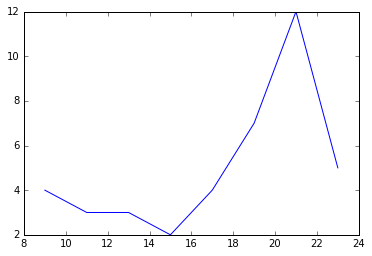

In [27]:
import matplotlib.pyplot as plt
plt.plot(avereges, Nin)
plt.show()

Медіана

In [28]:
np.median(an)

19.0

мода

In [29]:
from statistics import mode
mode(an)

20

Незміщена оцінка дисперсії

In [30]:
from statistics import variance
print(variance((a)))
print(np.cov(an))

19.66602564102564
19.666025641025644


Середнє квадратичне відхилення

In [31]:
from statistics import pvariance
from math import sqrt
print(sqrt(pvariance((a))))
print(sqrt(np.var(an)))

4.378855444062981
4.37885544406298


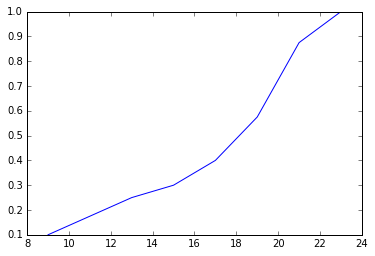

In [32]:
import matplotlib.pyplot as plt 
plt.plot(avereges, cumulative_frequencies)
plt.show()

Емпірична функція

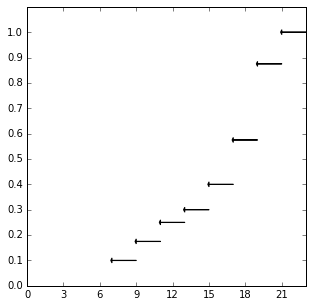

In [38]:
ax = plt.axes()
plt.rcParams['figure.figsize'] = 5, 5
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xlim(0, an.max())
plt.ylim(0, 1.1)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 3))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.1))
for i, j in zip(xi, np.cumsum(ni)/n):
    ax.arrow(i, j, -2, 0.0,  head_width=0.02, head_length=0.1, fc='k', ec='k')
plt.show()